## 2.2.3.15: Enhancing the data assimilation routine within T-Route 

### Author: Tadd Bindas

#### Site of interest: The Old River Control Structure on the Mississippi River, LA

- Perform a simulation in which a time series of streamflow values is substracted from the flow of the Mississippi River and is added to the flow of the Atchafalaya River at the Old River Control Structure
- Demonstrate the aove simulation in a way that the last specified value in the flow time series persists instead of transitioning back to the simulated flow

### Step 0: Read in all of the necessary inputs:
- Old River Control Structure observations: https://waterdata.usgs.gov/monitoring-location/07381482/
- v20.1 Hydrofabric topological data for both the Atchafalaya and the Mississippi
  - Creating a subset for efficient demonstration
- NWM flow inputs
  - Taken from the model retrospective

##### Create v20.1 Hydrofabric domain

In [3]:
from pathlib import Path

import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

miss_gdf = gpd.read_file(Path("/home/tadd.bindas/github/pi4/t-route/test/water_transfer/domain/mississippi.gpkg"), layer="divides")
atcha_gdf = gpd.read_file(Path("/home/tadd.bindas/github/pi4/t-route/test/water_transfer/domain/atchafalaya.gpkg"), layer="divides")

old_river_point = atcha_gdf[atcha_gdf["divide_id"] == "cat-1304933"]


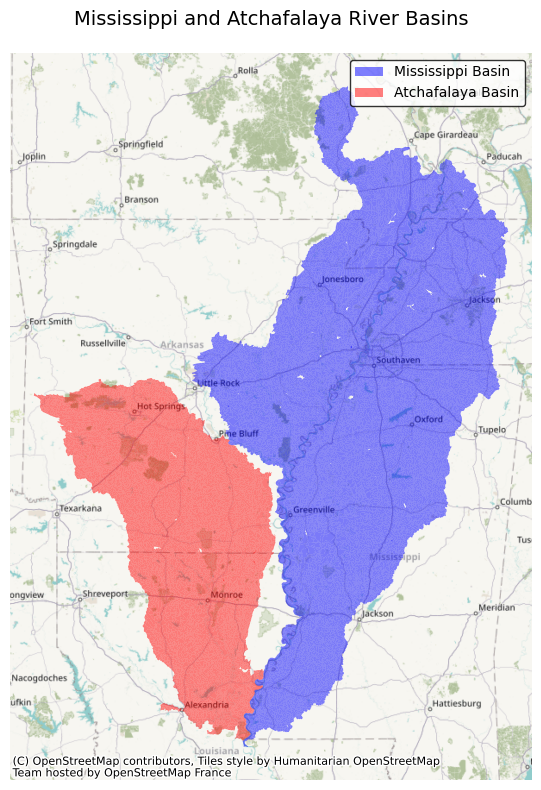

In [5]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(12, 8))
miss_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.5,
    color='blue',
    label='Mississippi Basin'
)
atcha_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.5,
    color='red',
    label='Atchafalaya Basin'
)

# Add a basemap
cx.add_basemap(ax)

# Customize the plot
ax.set_title('Mississippi and Atchafalaya River Basins', fontsize=14, pad=20)

# Create custom legend elements
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='Mississippi VPU 8 Sub-Basin'),
    Patch(facecolor='red', alpha=0.5, label='Atchafalaya VPU 8 Sub-Basin'),
]

# Add legend with custom elements
ax.legend(
    handles=legend_elements,
    loc='upper right',
    bbox_to_anchor=(1.0, 1.0),
    frameon=True,
    facecolor='white',
    edgecolor='black'
)
    

# Remove axes
ax.set_axis_off()

# Add scale bar
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


In [7]:
old_river_web


,divide_id,toid,type,ds_id,areasqkm,id,lengthkm,tot_drainage_areasqkm,has_flowline,geometry
4777,cat-1304933,nex-1304934,network,None,6.265801,wb-1304933,1.847612,6.2658,1,"POLYGON ((-10203682.260 3631252.736, -10203642..."


In [11]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(12, 8))

old_river_web = old_river_point.to_crs(3857)

centroid = old_river_web.geometry.centroid.iloc[0]


point_buffer = old_river_web.geometry.buffer(5000).bounds

# Plot the basins
miss_gdf.to_crs(3857).plot(ax=ax, alpha=0.5, color='blue')
atcha_gdf.to_crs(3857).plot(ax=ax, alpha=0.5, color='red')

# Plot the point using centroid coordinates
ax.scatter(
    centroid.x,
    centroid.y,
    color='yellow',
    marker='*',
    s=2000,  # size parameter for scatter
    edgecolor='black',
    zorder=5,
    label='Old River Control'
)

# Add label for Old River Control
ax.annotate(
    'Old River Control',
    xy=(centroid.x, centroid.y),
    xytext=(30, 30),
    textcoords='offset points',
    fontsize=12,
    fontweight='bold',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2')
)

# Set the map extent to the buffered area
ax.set_xlim(point_buffer.iloc[0]['minx'], point_buffer.iloc[0]['maxx'])
ax.set_ylim(point_buffer.iloc[0]['miny'], point_buffer.iloc[0]['maxy'])

# Add a basemap
cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.Positron,
    zoom='auto'
)

# Create custom legend elements
legend_elements = [
    Patch(facecolor='blue', alpha=0.5, label='Mississippi Basin'),
    Patch(facecolor='red', alpha=0.5, label='Atchafalaya Basin'),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='yellow',
            markeredgecolor='black', markersize=15, label='Old River Control')
]

# Add legend with custom elements
ax.legend(
    handles=legend_elements,
    loc='upper right',
    bbox_to_anchor=(1.0, 1.0),
    frameon=True,
    facecolor='white',
    edgecolor='black'
)

ax.set_title("Zooming in on the Old River Control Point")

# Remove axes
ax.set_axis_off()

# Add scale bar
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


In [ ]:
# Downloading NWM retrospective data
# ----------------------------------

# pip install 'teehr @ git+https://github.com/RTIInternational/teehr@v0.3.28'


### Step 1: Define a POI (HF_URI in v20.1) which bridges the hydrofabric

Given the Atchafalaya and the Mississippi have disconnected nexus points, there needs to be a POI to indicate where the two should be transferring water

### Step 2: Update config entries to reference data

### Step 3: Create a Transfer function

### Step 4: Run the Simulation